In [109]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit as fit
from ast import literal_eval

In [212]:
#sfwtab = pd.read_csv(r'C:\Users\atsch\Desktop\MasterVorlesungen\Masterthesis\Code\SFW_U_zero_to_five', index_col=0)
sfwtab_0 = pd.read_csv(r'sfw_scmu_5U_0-0c5_nu_eq_3', index_col=0)
sfwtab_1 = pd.read_csv(r'sfw_scmu_10U_0-3_nu_eq_3', index_col=0)
sfwtab_2 = pd.read_csv(r'sfw_scmu_20U_3c5-15_nu_eq_3', index_col=0)

#sfwtab2 = pd.read_csv(r'SFW_U_zero_to_2', index_col=0)
#sfwtab2 = pd.read_csv(r'SF_U_zero_to_1_nu_3', index_col=0)
sfwtab2 = pd.read_csv(r'111125_sc_Delta_ns_5U_0-1_20mu_-1-1', index_col=0)
sfwtab2 = pd.read_csv(r'SF_U_zero_to_5_nu_3', index_col=0)
sfwtab3 = pd.read_csv(r'SF_8U_3c5_to_7_nu_3', index_col=0)
sfwtab4 = pd.read_csv(r'SF_3U_7_to_10_nu_3', index_col=0)

sfwtab_6 = pd.read_csv(r'sfw_scmu_15U_0-6_nu_eq_3', index_col=0)


In [191]:
sfwtab = pd.concat((sfwtab_0.iloc[1:], sfwtab_1.iloc[1:], sfwtab_2), ignore_index=True)


In [213]:
sfwtab=sfwtab_6

In [230]:
sfwtab

,U,mu,nu,sq_det_SFW,SFWxx,SFWxy,delta,ns,deltaError,nError,SFWxx_new,SFWxy_new
0,0.0010,(-0.0004998413717437144-1.7883152986734597e-24j),(2.998250462479551-1.2770783474693569e-20j),(8.346040646090088-7.352054871500251e-19j),[-8.34604065e+00+3.90245873e-19j -6.10622664e-...,[-6.10622664e-18-1.23545523e-18j -8.34604065e+...,[(0.00014852142469814212+4.245898188581434e-21...,"[(1.0024913268986988-1.3582572839341786e-26j),...",5.789839e-06,0.000093,(-8.346040646090062+3.902458731314726e-19j),(-6.106226635438361e-18-1.2354552285469876e-18j)
1,0.4295,(-0.21467599371211615+1.827014311280258e-21j),(2.9980755174388207-8.938402564556858e-20j),(0.3896825065748752-9.817462930409363e-19j),[-3.89682507e-01+4.49249598e-19j -2.66453526e-...,[-2.55351296e-17-1.09641130e-18j -3.89682507e-...,[(0.020925916802191195-1.0685695198055897e-19j...,"[(1.00017069528518+2.4705925559432042e-21j), (...",1.761854e-07,0.000109,(-0.3896825065748765+4.4924959817713015e-19j),(-2.6645352591003756e-17-1.0964113035034922e-18j)
2,0.8580,(-0.4288339937222168+3.104947495563176e-21j),(2.9978171878811968-2.956755428390714e-20j),(0.4531133779580337-8.523341004482892e-20j),[-4.53113378e-01-3.58813650e-18j 3.99680289e-...,[ 4.13558077e-17-2.12036694e-19j -4.53113378e-...,[(0.044790695458479544-4.8399015897648093e-20j...,"[(1.000347221159172-1.3295068406479298e-20j), ...",2.696971e-07,0.000123,(-0.4531133779580345-3.588136503481741e-18j),(3.9968028886505634e-17-2.1203669442107947e-19j)
3,1.2865,(-0.6429821021960389+5.830414483631945e-21j),(2.9976254463623793-4.2120644709112415e-20j),(0.5376193956418674-4.416440011123957e-19j),[-5.37619396e-01+1.33311461e-19j 2.24820162e-...,[ 2.35922393e-17-1.71304188e-19j -5.37619396e-...,"[(0.07332597916210379+6.411713159534447e-20j),...","[(1.0006093943157193+1.6189616891295637e-21j),...",2.125034e-06,0.000133,(-0.5376193956418776+1.3331146148205077e-19j),(2.248201624865942e-17-1.7130418843168386e-19j)
4,1.7150,(-0.8570933886243643-1.1014693139777215e-21j),(2.997269533896009-2.656532750449847e-21j),(0.6092993894554973+1.1273105363724395e-18j),[-6.09299389e-01-8.09989473e-19j -1.31838984e-...,[-1.84574578e-17+5.63908171e-19j -6.09299389e-...,"[(0.10683159241352802+3.860424754569128e-20j),...","[(1.0010265049284723-2.8146752641454596e-20j),...",9.214013e-06,0.000147,(-0.609299389455496-8.099894730111668e-19j),(-1.3183898417423735e-17+5.639081707691881e-19j)
5,2.1435,(-1.071164777111417-4.299893314027255e-21j),(2.9968292351281147-2.8437121241776215e-20j),(0.665083790031751-2.0935444886275209e-19j),[-6.65083790e-01+2.56825759e-19j 9.48850373e-...,[ 8.71134762e-17-6.25222198e-19j -6.65083790e-...,"[(0.14491058101542467-3.799604164848071e-20j),...","[(1.0016411103606662+2.9989442575877354e-20j),...",3.717455e-05,0.000162,(-0.6650837900317371+2.5682575945682775e-19j),(9.48850373272414e-17-6.252221977859112e-19j)
6,2.5720,(-1.2852350075252836-2.8494395460364676e-20j),(2.9965267300122957+1.2548709876861008e-19j),(0.7029275668427744-1.2924003606197808e-19j),[-7.02927567e-01-3.60485468e-19j -3.35495520e-...,[-3.31332184e-17-7.92398057e-19j -7.02927567e-...,[(0.18609113818637943-1.7346587350775065e-19j)...,"[(1.0023548065443397-4.7388477719491287e-20j),...",1.463267e-04,0.000166,(-0.702927566842785-3.6048546782000324e-19j),(-3.354955202539145e-17-7.923980569161848e-19j)
7,3.0005,(-1.4995482566612734+1.3378853680040386e-20j),(2.997256846268392+1.3631157926992484e-20j),(0.7216655003316854+5.427456465140677e-19j),[-7.21665500e-01+3.80267916e-19j 8.34401992e-...,[ 4.80518403e-18-9.32936401e-20j -7.21665500e-...,"[(0.2269526021437528+4.1613878526968026e-20j),...","[(1.0023631624185234+1.597444212770962e-20j), ...",1.380891e-04,0.000122,(-0.7216655003316831+3.8026791558987217e-19j),(8.344019919448443e-18-9.329364009514948e-20j)
8,3.4290,(-1.7138730677486902+9.28347724553675e-21j),(2.997852820827051-3.043197328165016e-20j),(0.7230264766229522+1.5457188150839381e-18j),[-7.23026477e-01-4.14500843e-19j 2.52341618e-...,[ 2.57198844e-17+3.60356861e-19j -7.23026

In [214]:
sfwtab_nu3 = pd.concat((sfwtab2, sfwtab3, sfwtab4), ignore_index=True)


In [215]:
sfwtab2.ns=sfwtab2.ns.apply(lambda x: literal_eval(str(x)))
sfwtab2.delta=sfwtab2.delta.apply(lambda x: literal_eval(str(x)))



In [216]:
sfwtab_nu3.SFWxx.iloc[24][1:-1]

'-0.33787995-2.58428123e-18j  0.00631081+2.94135836e-20j'

In [217]:
vals = []
for i in range(25):
    vals.append(np.fromstring(sfwtab_nu3.SFWxx.iloc[i][1:-1], dtype=complex, count=2, sep=' '))

In [218]:
sfwtab_nu3['SFWxx_new'] = vals

In [219]:
delta_sc = np.array(sfwtab2.delta.iloc[1], dtype=complex)
ns_sc = np.array(sfwtab2.ns.iloc[1], dtype=complex)

ham2 = hamiltonian.Model(N=2, T=0, kind='dDSL', delta=delta_sc, ns=ns_sc, U=[0,0], mu=[0,0])

In [220]:
delta_sc

array([0.07346148+1.59956388e-20j, 0.28663527+1.26499677e-18j])

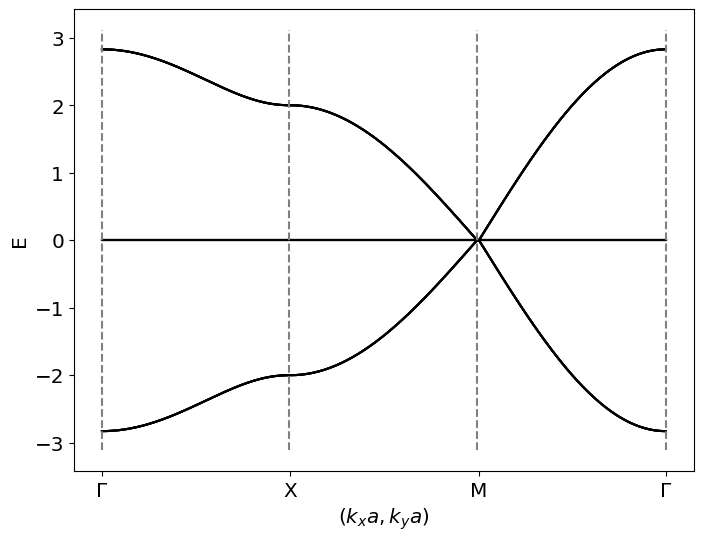

In [221]:
ham2.plot_bands()

In [222]:
U = np.array(sfwtab.U)
mu=np.array(sfwtab.mu)
nu = np.array(sfwtab.nu, dtype=complex)
sdsfw = np.array(sfwtab.sq_det_SFW, dtype=complex)

In [223]:
xarr = np.array(sfwtab.U.loc[sfwtab.mu==sfwtab.mu.iloc[0]])
yarr = np.array(sfwtab.nu.loc[sfwtab.mu==sfwtab.mu.iloc[0]], dtype=complex)

In [224]:
sfwtab.mu.iloc[0]

'(-0.0004998413717437144-1.7883152986734597e-24j)'

C:\Users\atsch\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\matplotlib\collections.py:193: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


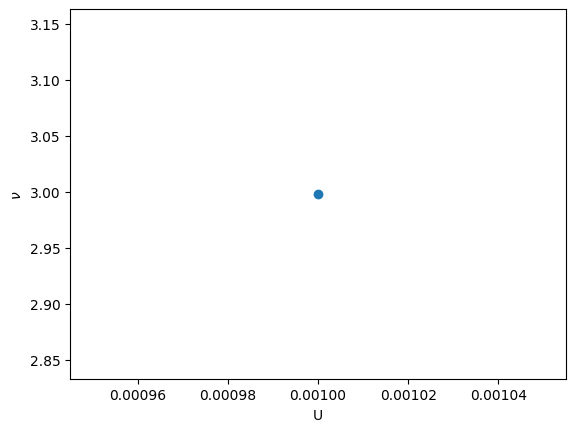

In [225]:
plt.xlabel('U')
plt.ylabel(r'$\nu$')
plt.scatter(xarr, yarr)

In [226]:
U = np.array(sfwtab.U)
nu = np.array(sfwtab.nu, dtype=complex)
sdsfw = np.array(sfwtab.sq_det_SFW, dtype=complex)
sfwxx = np.array(sfwtab.SFWxx_new, dtype=complex)


In [227]:
sfwtab

,U,mu,nu,sq_det_SFW,SFWxx,SFWxy,delta,ns,deltaError,nError,SFWxx_new,SFWxy_new
0,0.0010,(-0.0004998413717437144-1.7883152986734597e-24j),(2.998250462479551-1.2770783474693569e-20j),(8.346040646090088-7.352054871500251e-19j),[-8.34604065e+00+3.90245873e-19j -6.10622664e-...,[-6.10622664e-18-1.23545523e-18j -8.34604065e+...,[(0.00014852142469814212+4.245898188581434e-21...,"[(1.0024913268986988-1.3582572839341786e-26j),...",5.789839e-06,0.000093,(-8.346040646090062+3.902458731314726e-19j),(-6.106226635438361e-18-1.2354552285469876e-18j)
1,0.4295,(-0.21467599371211615+1.827014311280258e-21j),(2.9980755174388207-8.938402564556858e-20j),(0.3896825065748752-9.817462930409363e-19j),[-3.89682507e-01+4.49249598e-19j -2.66453526e-...,[-2.55351296e-17-1.09641130e-18j -3.89682507e-...,[(0.020925916802191195-1.0685695198055897e-19j...,"[(1.00017069528518+2.4705925559432042e-21j), (...",1.761854e-07,0.000109,(-0.3896825065748765+4.4924959817713015e-19j),(-2.6645352591003756e-17-1.0964113035034922e-18j)
2,0.8580,(-0.4288339937222168+3.104947495563176e-21j),(2.9978171878811968-2.956755428390714e-20j),(0.4531133779580337-8.523341004482892e-20j),[-4.53113378e-01-3.58813650e-18j 3.99680289e-...,[ 4.13558077e-17-2.12036694e-19j -4.53113378e-...,[(0.044790695458479544-4.8399015897648093e-20j...,"[(1.000347221159172-1.3295068406479298e-20j), ...",2.696971e-07,0.000123,(-0.4531133779580345-3.588136503481741e-18j),(3.9968028886505634e-17-2.1203669442107947e-19j)
3,1.2865,(-0.6429821021960389+5.830414483631945e-21j),(2.9976254463623793-4.2120644709112415e-20j),(0.5376193956418674-4.416440011123957e-19j),[-5.37619396e-01+1.33311461e-19j 2.24820162e-...,[ 2.35922393e-17-1.71304188e-19j -5.37619396e-...,"[(0.07332597916210379+6.411713159534447e-20j),...","[(1.0006093943157193+1.6189616891295637e-21j),...",2.125034e-06,0.000133,(-0.5376193956418776+1.3331146148205077e-19j),(2.248201624865942e-17-1.7130418843168386e-19j)
4,1.7150,(-0.8570933886243643-1.1014693139777215e-21j),(2.997269533896009-2.656532750449847e-21j),(0.6092993894554973+1.1273105363724395e-18j),[-6.09299389e-01-8.09989473e-19j -1.31838984e-...,[-1.84574578e-17+5.63908171e-19j -6.09299389e-...,"[(0.10683159241352802+3.860424754569128e-20j),...","[(1.0010265049284723-2.8146752641454596e-20j),...",9.214013e-06,0.000147,(-0.609299389455496-8.099894730111668e-19j),(-1.3183898417423735e-17+5.639081707691881e-19j)
5,2.1435,(-1.071164777111417-4.299893314027255e-21j),(2.9968292351281147-2.8437121241776215e-20j),(0.665083790031751-2.0935444886275209e-19j),[-6.65083790e-01+2.56825759e-19j 9.48850373e-...,[ 8.71134762e-17-6.25222198e-19j -6.65083790e-...,"[(0.14491058101542467-3.799604164848071e-20j),...","[(1.0016411103606662+2.9989442575877354e-20j),...",3.717455e-05,0.000162,(-0.6650837900317371+2.5682575945682775e-19j),(9.48850373272414e-17-6.252221977859112e-19j)
6,2.5720,(-1.2852350075252836-2.8494395460364676e-20j),(2.9965267300122957+1.2548709876861008e-19j),(0.7029275668427744-1.2924003606197808e-19j),[-7.02927567e-01-3.60485468e-19j -3.35495520e-...,[-3.31332184e-17-7.92398057e-19j -7.02927567e-...,[(0.18609113818637943-1.7346587350775065e-19j)...,"[(1.0023548065443397-4.7388477719491287e-20j),...",1.463267e-04,0.000166,(-0.702927566842785-3.6048546782000324e-19j),(-3.354955202539145e-17-7.923980569161848e-19j)
7,3.0005,(-1.4995482566612734+1.3378853680040386e-20j),(2.997256846268392+1.3631157926992484e-20j),(0.7216655003316854+5.427456465140677e-19j),[-7.21665500e-01+3.80267916e-19j 8.34401992e-...,[ 4.80518403e-18-9.32936401e-20j -7.21665500e-...,"[(0.2269526021437528+4.1613878526968026e-20j),...","[(1.0023631624185234+1.597444212770962e-20j), ...",1.380891e-04,0.000122,(-0.7216655003316831+3.8026791558987217e-19j),(8.344019919448443e-18-9.329364009514948e-20j)
8,3.4290,(-1.7138730677486902+9.28347724553675e-21j),(2.997852820827051-3.043197328165016e-20j),(0.7230264766229522+1.5457188150839381e-18j),[-7.23026477e-01-4.14500843e-19j 2.52341618e-...,[ 2.57198844e-17+3.60356861e-19j -7.23026

nu=s*U for fixed mu?

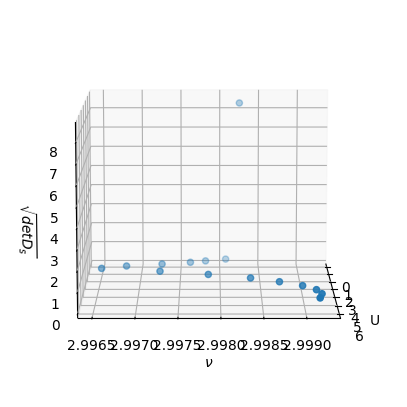

In [228]:
fig = plt.figure(figsize=(5,15))
ax = fig.add_subplot(projection='3d')

ax.scatter(U,np.real(nu), np.real(sdsfw), marker='o')

ax.set_xlabel('U')
ax.set_ylabel(r'$\nu$')
ax.set_zlabel(r'$\sqrt{det D_s}$')
ax.view_init(elev=10, azim=0, roll=0)

plt.show()

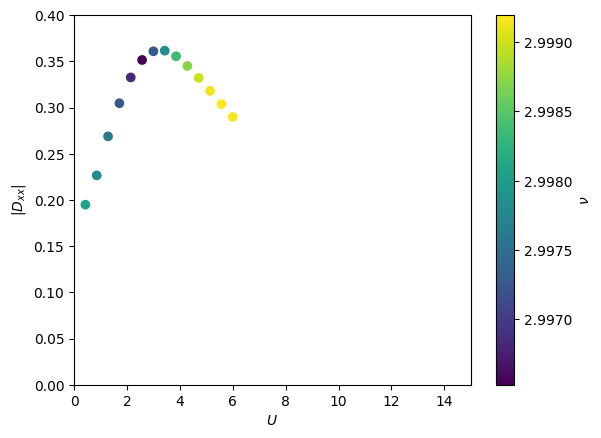

In [232]:
plt.xlabel(r'$U$')
plt.ylabel(r'$|D_{xx}|$')
plt.ylim(0,0.4)
plt.xlim(0,15)
plt.scatter(U[0:], np.abs(sfwxx[0:])/2, c=nu[0:])
plt.colorbar(label=r'$\nu$')

In [149]:
sfwxx[-1]/2

(-0.30322377117299504-5.785995240439578e-19j)

In [139]:
U = np.array(sfwtab2.U)
mu=np.array(sfwtab2.mu)
nu = np.array(sfwtab2.nu, dtype=complex)
deltas = np.array([*sfwtab2.delta], dtype=complex)
sdsfw = np.array(sfwtab2.sq_det_SFW, dtype=complex)

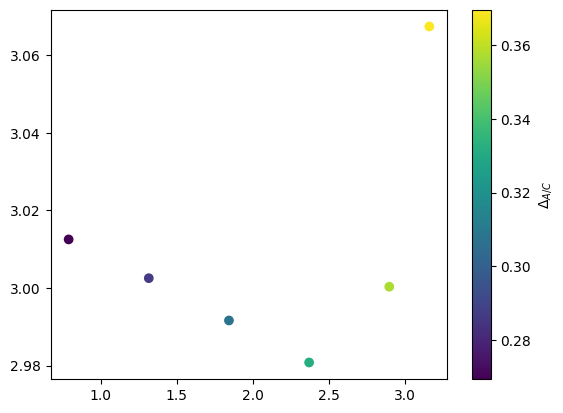

In [140]:
plt.scatter(U, nu,c=deltas[:,1])
plt.colorbar(label=r'$\Delta_{A/C}$')

In [141]:
def linfunc(x,m,n):
    return x*m+n

params, covp = fit(linfunc, U, mu)

In [130]:
covp

array([[ 6.04125887e-05, -1.24534715e-04],
       [-1.24534715e-04,  2.99134239e-04]])

In [131]:
Uarr = np.linspace(0,10,100)

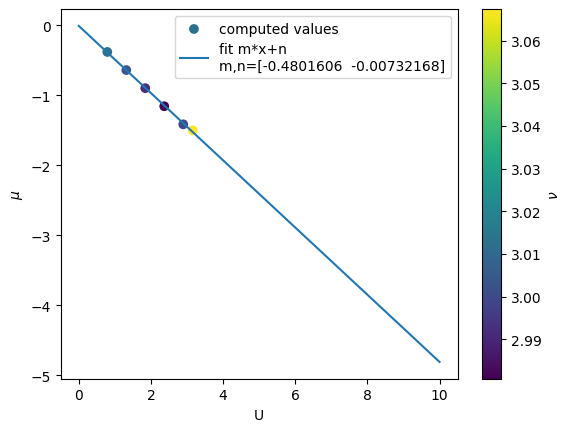

In [132]:
plt.xlabel('U')
plt.ylabel('$\mu$')


plt.scatter(U, mu,c=nu, label='computed values')
plt.plot(Uarr, linfunc(Uarr,*params), label=f'fit m*x+n\nm,n={params}')
plt.colorbar(label=r'$\nu$')
plt.legend()

In [133]:
sfwtab2.delta.iloc[:]

0    [(0.039231628800422746-1.4294820463225363e-20j...
1    [(0.07346148097379634+1.5995638795942288e-20j)...
2    [(0.11501086870790828-3.1556850834524705e-20j)...
3    [(0.16270137315548883-1.1123486447349069e-19j)...
4    [(0.21315378835497134-2.4663388890494768e-21j)...
5    [(0.23835008010253522+5.2642499423357043e-20j)...
Name: delta, dtype: object

In [134]:
np.array([*sfwtab2.delta])[:,1]

array([0.26928819+1.00843278e-18j, 0.28663527+1.26499677e-18j,
       0.30751637+3.33516198e-19j, 0.33143046+8.33129640e-19j,
       0.35684187-7.45607011e-19j, 0.36968755-5.67527824e-19j])

In [28]:
sfwtab2.nu.loc[np.array([*sfwtab2.delta])[:,1]>0.2]

0     (3.0125129674257893+6.234609998058662e-20j)
1     (3.002526394176937+1.2448983313124826e-19j)
2    (2.9916271552326927+1.3540663784257466e-19j)
3     (2.980798389253744+1.0116051489969854e-19j)
4      (3.000322313403875+3.183236749859206e-20j)
5        (3.067392620107659+5.6547616617445e-20j)
Name: nu, dtype: object

In [29]:
xarr = np.array(sfwtab2.U.loc[np.array(sfwtab2.nu, dtype=complex)>2])
yarr = np.array(sfwtab2.nu.loc[np.array(sfwtab2.nu, dtype=complex)>2], dtype=complex)
carr = np.array(sfwtab2.mu.loc[np.array(sfwtab2.nu, dtype=complex)>2], dtype=complex)

In [30]:
sfwtab2.mu.iloc[1]

-0.6379310344827586

C:\Users\atsch\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\matplotlib\cbook\__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


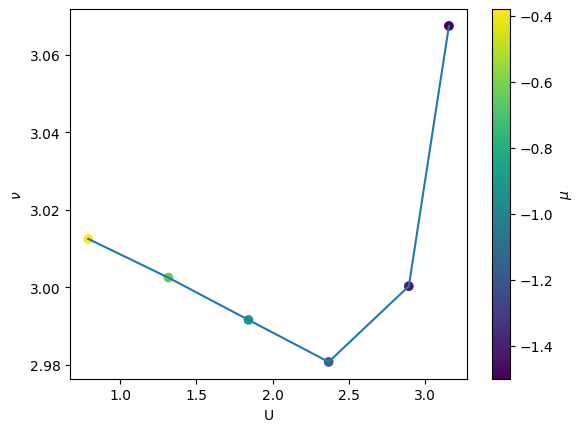

In [31]:
plt.xlabel('U')
plt.ylabel(r'$\nu$')
plt.scatter(U, nu, c=mu)
plt.plot(xarr, yarr)
plt.colorbar(label=r'$\mu$')

In [32]:
#U = np.array(sfwtab2.U.loc[np.array(sfwtab2.sq_det_SFW, dtype=complex) <= 2])
#nu = np.array(sfwtab2.nu.loc[np.array(sfwtab2.sq_det_SFW, dtype=complex) <= 2], dtype=complex)
#sdsfw = np.array(sfwtab2.sq_det_SFW.loc[np.array(sfwtab2.sq_det_SFW, dtype=complex) <= 2], dtype=complex)
#U = np.array(sfwtab2.U.loc[sfwtab2.U >= 1])
#nu = np.array(sfwtab2.nu.loc[sfwtab2.U >= 1], dtype=complex)
#sdsfw = np.array(sfwtab2.sq_det_SFW.loc[sfwtab2.U >= 1], dtype=complex)

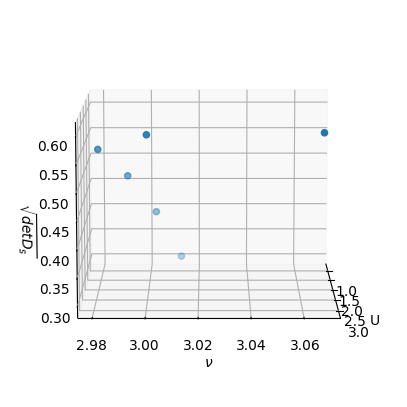

In [33]:
fig = plt.figure(figsize=(5,15))
ax = fig.add_subplot(projection='3d')

ax.scatter(U,np.real(nu), np.real(sdsfw), marker='o')

ax.set_xlabel('U')
ax.set_ylabel(r'$\nu$')
ax.set_zlabel(r'$\sqrt{det D_s}$')
ax.view_init(elev=10, azim=0, roll=0)

plt.show()

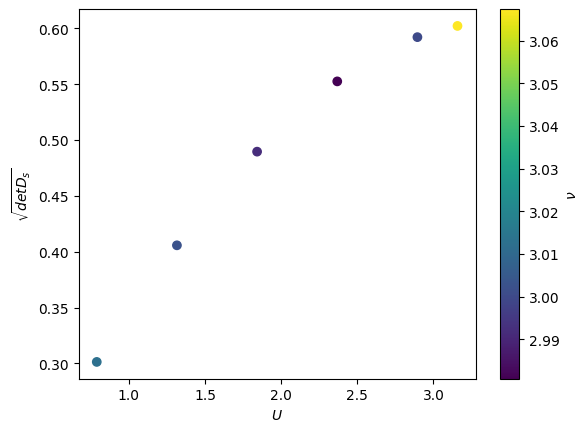

In [34]:
plt.xlabel(r'$U$')
plt.ylabel(r'$\sqrt{det D_s}$')
plt.scatter(U, sdsfw, c=nu)
plt.colorbar(label=r'$\nu$')

In [35]:
xarr = np.array(sfwtab2.mu.loc[sfwtab2.U==0.5])
yarr = np.array(sfwtab2.nu.loc[sfwtab2.U==0.5], dtype=complex)

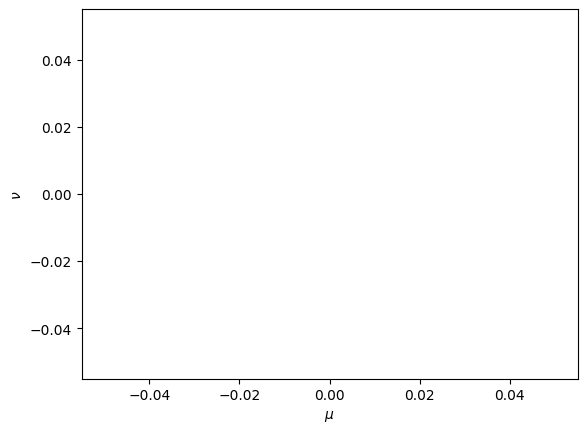

In [36]:
plt.xlabel(r'$\mu$')
plt.ylabel(r'$\nu$')
plt.scatter(xarr, yarr)

In [85]:
sfwtab_nu3

,U,mu,nu,sq_det_SFW,SFWxx,SFWxy,delta,ns,deltaError,nError,SFWxx_new
0,0.789474,-0.379310,(3.0125129674257893+6.234609998058662e-20j),(0.30132791061889413+8.496811714537978e-19j),[-0.31792947-8.54352371e-19j 0.10139348+1.594...,[ 0.10139348+1.59425798e-19j -0.31792947-8.579...,[(0.039231628800422746-1.4294820463225363e-20j...,"[(1.0071755337127803-1.1503340639881321e-21j),...",0.000131,0.010043,"[(-0.31792947-8.54352371e-19j), (0.10139348+1...."
1,1.315789,-0.637931,(3.002526394176937+1.2448983313124826e-19j),(0.40572315183623986+1.2167101303361298e-19j),[-0.42400223-2.09399052e-18j 0.12315281+4.646...,[ 0.12315281+4.64604229e-19j -0.42400223+1.591...,[(0.07346148097379634+1.5995638795942288e-20j)...,"[(1.0124688095971675-4.874791067294561e-21j), ...",0.000140,0.007867,"[(-0.42400223-2.09399052e-18j), (0.12315281+4...."
2,1.842105,-0.896552,(2.9916271552326927+1.3540663784257466e-19j),(0.48956645476016836+9.314418080599053e-19j),[-0.50586695-9.79663434e-19j 0.12738154+2.439...,[ 0.12738154+2.43939149e-19j -0.50586695-9.460...,[(0.11501086870790828-3.1556850834524705e-20j)...,"[(1.0214177295090296+1.1110812088917562e-20j),...",0.000164,0.006778,"[(-0.50586695-9.79663434e-19j), (0.12738154+2...."
3,2.368421,-1.155172,(2.980798389253744+1.0116051489969854e-19j),(0.5524702242960879+1.6423717029128016e-18j),[-0.56512313-2.46930914e-18j 0.11891512+5.978...,[ 0.11891512+5.9780321e-19j -0.56512313-9.9347...,[(0.16270137315548883-1.1123486447349069e-19j)...,"[(1.0350266192042512-1.685064724170448e-20j), ...",0.000190,0.005987,"[(-0.56512313-2.46930914e-18j), (0.11891512+5...."
4,2.894737,-1.413793,(3.000322313403875+3.183236749859206e-20j),(0.592078737784757+2.3432438167120857e-18j),[-0.60091627-1.59552211e-18j 0.10267977+4.142...,[ 0.10267977+4.14299330e-19j -0.60091627-3.163...,[(0.21315378835497134-2.4663388890494768e-21j)...,"[(1.0416171879996174-1.5001602993102552e-22j),...",0.000153,0.005364,"[(-0.60091627-1.59552211e-18j), (0.10267977+4...."
5,3.157895,-1.500000,(3.067392620107659+5.6547616617445e-20j),(0.6021168516153828+3.4181087730172883e-18j),[-0.60900182-2.46872540e-18j 0.09131549+6.135...,[ 0.09131549+6.13580789e-19j -0.60900182-4.474...,[(0.23835008010253522+5.2642499423357043e-20j)...,"[(1.0597695654688448+1.1890854959015373e-20j),...",0.000165,0.010134,"[(-0.60900182-2.4687254e-18j), (0.09131549+6.1..."
6,3.500000,-1.687884,(3.011093059235288-1.3273663844390345e-19j),(0.6044952102647275+3.929227502093128e-18j),[-0.60980572-3.61749577e-18j 0.08030292+3.929...,[ 0.08030292+3.92906274e-19j -0.60980572-4.276...,"[(0.266324660189894+1.2475794408244965e-19j), ...","[(1.0781590553505125-1.9504850495616525e-20j),...",0.000155,0.006960,"[(-0.60980572-3.61749577e-18j), (0.08030292+3...."
7,4.000000,-1.927964,(3.027275908945162-1.056275850134212e-19j),(0.5965898844346423+4.4112488965183235e-18j),[-0.60000563-4.66190313e-18j 0.06393173+7.697...,[ 0.06393173+7.69703519e-19j -0.60000563-4.274...,"[(0.30395148270120115-2.836854218094826e-19j),...","[(1.0920202441971705-2.717921412787676e-20j), ...",0.000172,0.006342,"[(-0.60000563-4.66190313e-18j), (0.06393173+7...."
8,4.500000,-2.218044,(2.9277761895297885+1.2281393083721393e-19j),(0.5723521152308779+3.6632652960814816e-18j),[-0.57461494-3.38212331e-18j 0.05094493-1.088...,[ 0.05094493-1.08898603e-19j -0.57461494-3.896...,"[(0.3335997047777735+2.874460536841101e-20j), ...","[(1.1140047341726862+5.675936729167965e-20j), ...",0.000176,0.002598,"[(-0.57461494-3.38212331e-18j), (0.05094493-1...."
9,4.500000,-2.168044,(3.052840280713009-3.812379329849967e-21j),(0.578245700748034+3.790936708254203e-18j),[-0.58043547-4.63751707e-18j 0.0503711 -1.262...,[ 0.0503711 -1.26221445e-19j -0.58043547-2.893...,"[(0.3350447285992281-2.7878444086737473e-19j),...","[(1.1023013489347608-2.4279896398953918e-20j),...",0.000168,0.005861,"[(-0.58043547-4.63751707e-18j), (0.0503711+0j)]"


In [101]:
U = np.array(sfwtab_nu3.U)
mu=np.array(sfwtab_nu3.mu)
nu = np.array(sfwtab_nu3.nu, dtype=complex)
sdsfw = np.array(sfwtab_nu3.sq_det_SFW, dtype=complex)
sfwxx = np.array(list(sfwtab_nu3.SFWxx_new))[:,0]
sfwxy = np.array(list(sfwtab_nu3.SFWxx_new))[:,1]

In [97]:
sfwxx

array([-0.31792947-8.54352371e-19j, -0.42400223-2.09399052e-18j,
       -0.50586695-9.79663434e-19j, -0.56512313-2.46930914e-18j,
       -0.60091627-1.59552211e-18j, -0.60900182-2.46872540e-18j,
       -0.60980572-3.61749577e-18j, -0.60000563-4.66190313e-18j,
       -0.57461494-3.38212331e-18j, -0.58043547-4.63751707e-18j,
       -0.55179428-4.58423539e-18j, -0.55549531-4.46324885e-18j,
       -0.52650704-4.03952088e-18j, -0.52834913-4.16294594e-18j,
       -0.50031328-2.67898476e-18j, -0.50129475-3.46935792e-18j,
       -0.47493681-4.00686859e-18j, -0.44704915-2.65232951e-18j,
       -0.45075953-2.57683370e-18j, -0.44704915-2.65232951e-18j,
       -0.45075953-2.57683370e-18j, -0.45024449-3.23108815e-18j,
       -0.38735759-2.81274048e-18j, -0.38720481-3.55806514e-18j,
       -0.33787995-2.58428123e-18j])

In [ ]:
fig = plt.figure(figsize=(5,15))
ax = fig.add_subplot(projection='3d')

ax.scatter(U,np.real(nu), np.real(sdsfw), marker='o')

ax.set_xlabel('U')
ax.set_ylabel(r'$\nu$')
ax.set_zlabel(r'$\sqrt{det D_s}$')
ax.view_init(elev=10, azim=0, roll=0)

plt.show()

NameError: name 'plt' is not defined

In [ ]:
plt.xlabel('U')
plt.ylabel(r'$\nu$')
plt.scatter(U, nu, c=mu)
plt.plot(xarr, yarr)
plt.colorbar(label=r'$\mu$')

NameError: name 'plt' is not defined

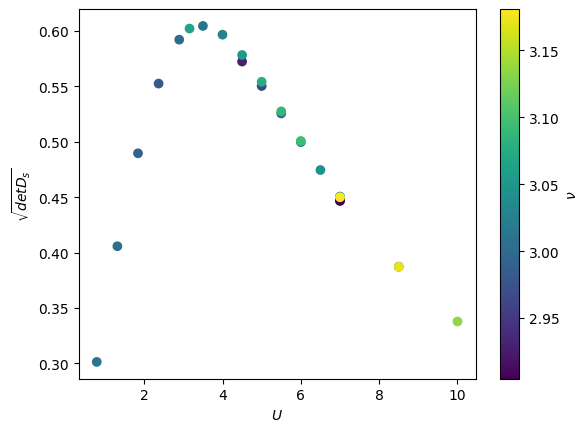

In [ ]:
plt.xlabel(r'$U$')
plt.ylabel(r'$\sqrt{det D_s}$')
plt.scatter(U, sdsfw, c=nu)
plt.colorbar(label=r'$\nu$')

In [104]:
sfwxx

array([-0.31792947-8.54352371e-19j, -0.42400223-2.09399052e-18j,
       -0.50586695-9.79663434e-19j, -0.56512313-2.46930914e-18j,
       -0.60091627-1.59552211e-18j, -0.60900182-2.46872540e-18j,
       -0.60980572-3.61749577e-18j, -0.60000563-4.66190313e-18j,
       -0.57461494-3.38212331e-18j, -0.58043547-4.63751707e-18j,
       -0.55179428-4.58423539e-18j, -0.55549531-4.46324885e-18j,
       -0.52650704-4.03952088e-18j, -0.52834913-4.16294594e-18j,
       -0.50031328-2.67898476e-18j, -0.50129475-3.46935792e-18j,
       -0.47493681-4.00686859e-18j, -0.44704915-2.65232951e-18j,
       -0.45075953-2.57683370e-18j, -0.44704915-2.65232951e-18j,
       -0.45075953-2.57683370e-18j, -0.45024449-3.23108815e-18j,
       -0.38735759-2.81274048e-18j, -0.38720481-3.55806514e-18j,
       -0.33787995-2.58428123e-18j])

C:\Users\atsch\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\matplotlib\axes\_axes.py:4347: ComplexWarning: Casting complex values to real discards the imaginary part
  c = np.asanyarray(c, dtype=float)
C:\Users\atsch\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\matplotlib\collections.py:193: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


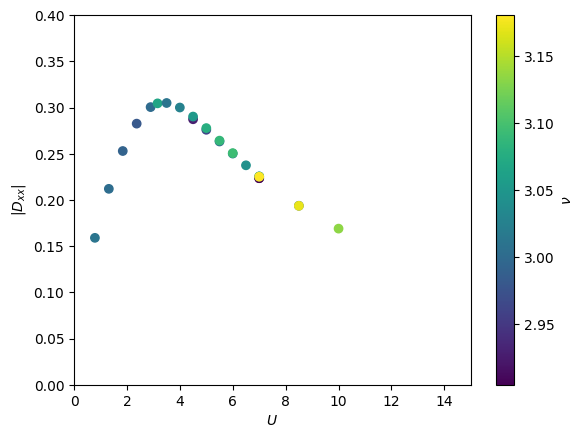

In [105]:
plt.xlabel(r'$U$')
plt.ylabel(r'$|D_{xx}|$')
plt.xlim(0,15)
plt.ylim(0,0.4)
plt.scatter(U, np.sqrt(sfwxx**2)/2, c=nu)
#plt.scatter(U, np.sqrt(sfwxy**2), c=nu)

plt.colorbar(label=r'$\nu$')